# URDU Notebook

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np 
import glob
import os
from os.path import isfile, join
import soundfile as sf 
import sys
import librosa 
import librosa.display
import seaborn as sbn
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from IPython.display import Audio
import scipy.io.wavfile
from scipy.fftpack import dct
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import ReduceLROnPlateau

In [2]:
# File path
UrduData = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/URDU-Dataset-master/URDU-Dataset-master/"

In [3]:
# Extracting URDU data
fileEmotion_URDU = []
filePath_URDU = []
UrduList = os.listdir(UrduData)
for dir in UrduList: # extract files for each actor
    path = UrduData + dir
    emotionList = os.listdir(path)
    for x in emotionList:
        filePath_URDU.append(UrduData + dir + '/' + x)
        fileEmotion_URDU.append(dir[0])
dfEmotion_URDU = pd.DataFrame(fileEmotion_URDU, columns=['Emotions_URDU'])
dfPath_URDU = pd.DataFrame(filePath_URDU, columns=['Path_URDU'])
dfUrdu = pd.concat([dfEmotion_URDU, dfPath_URDU], axis=1)
dfPath_URDU = pd.concat([dfUrdu], axis = 0)
#dfPath.to_csv("data_path.csv",index=False)
#dfPath_CASIA.head()

#renaming integers to emotions
dfUrdu.Emotions_URDU.replace({'A':'Anger', 'H':'Happy', 'N':'Neutral', 'S':'Sad'}, inplace=True)
dfUrdu[dfUrdu['Emotions_URDU'].str.contains("St")==False]
dfUrdu[~dfUrdu.Path_URDU.str.contains('|'.join(["DS_Store"]))]

,Emotions_URDU,Path_URDU
0,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
1,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
2,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
3,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
4,Anger,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
...,...,...
395,Sad,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
396,Sad,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
397,Sad,C:/Users/Lenovo/Documents/3rd Year Project/Dat...
398,Sad,C:/Users/Lenovo/Documents/3rd Year Project/Dat...


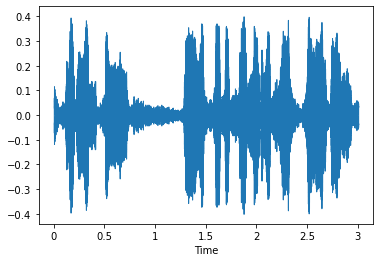

In [4]:
# Print waveform
signal_URDU, sr = librosa.load(dfUrdu.Path_URDU[0])
librosa.display.waveshow(signal_URDU,sr=sr)
#print(len(dfPath.Path))

Anger      100
Happy      100
Neutral    100
Sad        100
Name: Emotions_URDU, dtype: int64

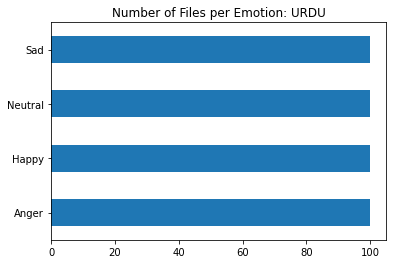

In [5]:
# Emotions per file
distribution = dfUrdu['Emotions_URDU'].value_counts().plot(kind='barh', title='Number of Files per Emotion: URDU')
dfUrdu['Emotions_URDU'].value_counts()

In [7]:
# Obtain file duration
fileDuration = []
for path in dfUrdu.Path_URDU:
    signal,sr = librosa.load(path)
    fileDuration.append(len(signal))
#fileDuration

[66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 44100,
 66228,
 44100,
 66228,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 21876,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 44100,
 66228,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 44100,
 66228,
 66228,


In [12]:
# Calculate file durations
avgDuration = sum(fileDuration)/len(fileDuration)
minDuration = min(fileDuration)
maxDuration = max(fileDuration)
print(avgDuration/sr)
print(minDuration/sr)
print(maxDuration/sr)

dfUrdu['Duration'] = fileDuration
dfUrdu['Duration_sec'] = dfUrdu['Duration']/sr

2.496740136054422
0.992108843537415
3.0035374149659866


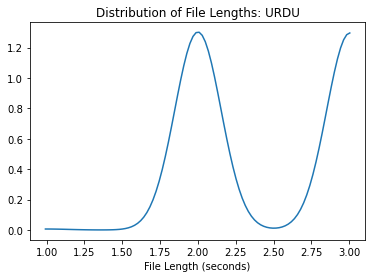

75.0% of files have a length shorter than 2.00 seconds.


In [13]:
# Plot distribution of file lengths
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

pdf = gaussian_kde(dfUrdu['Duration_sec'])
x = np.linspace(dfUrdu['Duration_sec'].min(), dfUrdu['Duration_sec'].max(), 100)
plt.plot(x,pdf(x))
plt.xlabel("File Length (seconds)")
plt.title("Distribution of File Lengths: URDU")
plt.show()

cdf = dfUrdu['Duration_sec'].value_counts(normalize=True).sort_index().cumsum()

threshold = 0.75
point = cdf[cdf <= threshold].index.max()
print(f"{threshold*100}% of files have a length shorter than {point:.2f} seconds.")

In [24]:
dfUrdu['Emotions_URDU'].value_counts()

Anger      100
Happy      100
Neutral    100
Sad        100
Name: Emotions_URDU, dtype: int64

In [28]:
# Baseline Pre-Procesing Method Cropped/Zero-Padded
# Save files for four emotions in new directory
count = 0
setfileDuration = 2*sr
filePath_h = 'C:/Users/Lenovo/Documents/3rd Year Project/Dataset/URDU_Baseline/'
for i in range(len(dfUrdu.Path_URDU)):
    path = dfUrdu['Path_URDU'][i]
    #print(path[93:]) #Angry 97, happy 97, neu 99, sad 95
    if dfUrdu['Emotions_URDU'][i] == 'Anger':
        savePath = filePath_h +'a'+"_" + path[97:]
    elif dfUrdu['Emotions_URDU'][i] == 'Happy':
        savePath = filePath_h +'h'+"_"+ path[97:]
    elif dfUrdu['Emotions_URDU'][i] == 'Neutral':
        savePath = filePath_h + 'n'+"_"+path[99:]
    elif dfUrdu['Emotions_URDU'][i] == 'Sad':
        savePath = filePath_h + 's'+"_"+path[95:]
    signal, sr = librosa.load(path)
    if dfUrdu['Duration'][i] != setfileDuration:
        trimmedFiles = librosa.util.fix_length(signal, int(setfileDuration))
        soundfile.write(savePath, trimmedFiles, sr)
        count = count+1
    else:
        soundfile.write(savePath, signal, sr)            
        count = count+1
print(count) 

400


In [3]:
# Applying another pre-processing method to 
# Applying MMSE to Cropped/Zero-padded files
import os
import soundfile as sf
import numpy as np
import librosa

# Set the directories for the input and output files
input_dir = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/URDU_Baseline/"
output_dir = "C:/Users/Lenovo/Documents/3rd Year Project/Dataset/URDU_MMSE/"

# Set the parameters for the MMSE algorithm
frame_length = 1024
frame_overlap = frame_length // 2
noise_std = 0.05

# Iterate over the audio files in the input directory
for filename in os.listdir(input_dir):
    # Load the audio file
    filepath = os.path.join(input_dir, filename)
    signal, sample_rate = sf.read(filepath)

    # Apply the MMSE algorithm
    noisy_stft = np.abs(librosa.stft(signal, n_fft=frame_length, hop_length=frame_overlap))
    noise_stft = np.abs(librosa.stft(np.random.randn(*signal.shape), n_fft=frame_length, hop_length=frame_overlap))
    noise_std_stft = noise_std * np.mean(noise_stft, axis=1, keepdims=True)
    gain = np.maximum(1 - noise_std_stft ** 2 / (noisy_stft ** 2 + noise_std_stft ** 2), 0)
    filtered_stft = gain * noisy_stft

    # Inverse STFT to get the filtered signal
    filtered_signal = librosa.istft(filtered_stft, hop_length=frame_overlap)

    # Save the filtered signal to a new file
    output_filepath = os.path.join(output_dir, filename)
    sf.write(output_filepath, filtered_signal, sample_rate)


In [13]:
# Extract MFCC features
from os import listdir
from os.path import isfile, join
data = []
label = []
Path = 'C:/Users/Lenovo/Documents/3rd Year Project/Dataset/URDU_MMSE/'
files = [f for f in listdir(Path) if isfile(join(Path, f))]
for x in files:
    filePath = Path + x
    label.append(x[0])
    signal, sr = librosa.load(filePath, sr=None)
    mfcc = librosa.feature.mfcc(signal, n_fft=2048, hop_length = 256, n_mfcc = 18) 
    data.append(mfcc)

In [14]:
# Relabel emotions numerically
for i in range(len(label)):
    if label[i] == 'a': # anger
        label[i] = 2
    if label[i] == 'n': # neutral
        label[i] = 3
    if label[i] == 'h': # happiness
        label[i] = 0
    if label[i] == 's': # sadness
        label[i] = 1
#print(label)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [15]:
data = np.array(data)
data.shape

(400, 18, 173)

In [16]:
# Reshape data to fit CNN
X = np.expand_dims(data, axis =3)
X.shape

(400, 18, 173, 1)

In [18]:
# Split data for training and testing 80/20
x_train, x_test, y_train, y_test = train_test_split(X, label, test_size = 0.2)

In [19]:
# Covert data to np arrays
X_train = np.array(x_train)
X_test = np.array(x_test)
Y_train = np.array(y_train)
Y_test = np.array(y_test)
print(Y_train.shape)

(320,)


In [20]:
# CNN
model = Sequential()
from keras.layers import BatchNormalization
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(18, 173, 1)))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(units=4, activation='softmax'))

In [21]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, Y_train, batch_size=32 , epochs=20 , verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
10/10 [==============================] - 27s 2s/step - loss: 1.2512 - accuracy: 0.6344 - val_loss: 53.5019 - val_accuracy: 0.3750
Epoch 2/20
10/10 [==============================] - 24s 2s/step - loss: 0.4526 - accuracy: 0.8469 - val_loss: 58.7160 - val_accuracy: 0.2625
Epoch 3/20
10/10 [==============================] - 27s 3s/step - loss: 0.2576 - accuracy: 0.9062 - val_loss: 47.4804 - val_accuracy: 0.2625
Epoch 4/20
10/10 [==============================] - 26s 3s/step - loss: 0.1117 - accuracy: 0.9531 - val_loss: 30.1667 - val_accuracy: 0.3000
Epoch 5/20
10/10 [==============================] - 29s 3s/step - loss: 0.0973 - accuracy: 0.9625 - val_loss: 17.1412 - val_accuracy: 0.3875
Epoch 6/20
10/10 [==============================] - 26s 3s/step - loss: 0.0511 - accuracy: 0.9937 - val_loss: 14.4911 - val_accuracy: 0.4000
Epoch 7/20
10/10 [==============================] - 26s 3s/step - loss: 0.0518 - accuracy: 0.9812 - val_loss: 10.9350 - val_accuracy: 0.4125
Epoch 8/20
10

In [42]:
# Testing for a range of epochs
best_val_acc = 0.0
best_epoch = None
num_epochs = 24
count = 0
Epoch_list = [1, 2 ,3,4,5,6, 8, 10, 14, 16, 18, 20, 24]
HistoryData = []
Val_loss_Data = []
Val_Acc_Data = []

for Loop_Var in Epoch_list:
    # Train the model for one epoch
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    history = model.fit(X_train, Y_train, batch_size=32 , epochs=Loop_Var , verbose=1, validation_data=(X_test, Y_test))
    HistoryData.append(history)

    # Evaluate the model on the validation set
    val_loss, val_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)
    Val_loss_Data.append(val_loss)
    Val_Acc_Data.append(val_acc)

    # Check if this epoch had the best validation accuracy so far
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_epoch = Loop_Var
        # Save the model weights for the best epoch
        model.save_weights('best_model_weights.h5')
    count = count + 1
    print(count)
print('Loop Completed')
# Load the weights for the best epoch
model.load_weights('best_model_weights.h5')

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, Y_test, batch_size=32, verbose=1)

print("Best epoch: {} with validation accuracy: {}".format(best_epoch, best_val_acc))
print("Test loss: {} Test accuracy: {}".format(test_loss, test_acc))

3/3 [==============================] - 1s 332ms/step - loss: 2.5854 - accuracy: 0.7000
1
Epoch 1/2
10/10 [==============================] - 17s 2s/step - loss: 0.1150 - accuracy: 0.9563 - val_loss: 8.6245 - val_accuracy: 0.4000
Epoch 2/2
3/3 [==============================] - 1s 347ms/step - loss: 5.3281 - accuracy: 0.5375
2
Epoch 1/3
10/10 [==============================] - 27s 3s/step - loss: 0.1685 - accuracy: 0.9250 - val_loss: 4.2100 - val_accuracy: 0.6250
Epoch 2/3
10/10 [==============================] - 16s 2s/step - loss: 0.1395 - accuracy: 0.9469 - val_loss: 4.7806 - val_accuracy: 0.6375
Epoch 3/3
3/3 [==============================] - 1s 260ms/step - loss: 5.5820 - accuracy: 0.5875
3
Epoch 1/4
10/10 [==============================] - 19s 2s/step - loss: 0.0635 - accuracy: 0.9781 - val_loss: 6.3139 - val_accuracy: 0.4750
Epoch 2/4
10/10 [==============================] - 16s 2s/step - loss: 0.0707 - accuracy: 0.9812 - val_loss: 8.5448 - val_accuracy: 0.5375
Epoch 3/4
10/10 [=

10/10 [==============================] - 20s 2s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.9622 - val_accuracy: 0.8875
Epoch 2/16
10/10 [==============================] - 16s 2s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.7522 - val_accuracy: 0.9000
Epoch 3/16
10/10 [==============================] - 16s 2s/step - loss: 0.0073 - accuracy: 0.9969 - val_loss: 1.5496 - val_accuracy: 0.8375
Epoch 4/16
10/10 [==============================] - 16s 2s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 1.1930 - val_accuracy: 0.8125
Epoch 5/16
10/10 [==============================] - 16s 2s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.8254 - val_accuracy: 0.9125
Epoch 6/16
10/10 [==============================] - 16s 2s/step - loss: 0.0055 - accuracy: 0.9969 - val_loss: 1.4113 - val_accuracy: 0.8625
Epoch 7/16
10/10 [==============================] - 16s 2s/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 2.1225 - val_accuracy: 0.8000
Epoch 8/16
10/10 [=============

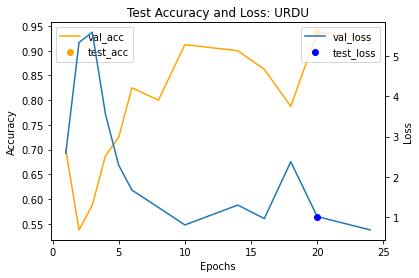

In [43]:
# Plot the test loss and accuracy
fig, ax1 = plt.subplots()
ax1.plot(Epoch_list, Val_Acc_Data, label='val_acc', color='orange')
ax1.plot(best_epoch, test_acc, 'o', label='test_acc', color='orange')
ax1.legend()
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy')
ax1.set_title('Test Accuracy and Loss: URDU')
ax2 =ax1.twinx()

ax2.plot(Epoch_list, Val_loss_Data, label='val_loss')
ax2.plot(best_epoch, test_loss, 'o', label='test_loss', color='blue')
ax2.legend()
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Loss')

plt.show()


3/3 [==============================] - 2s 252ms/step


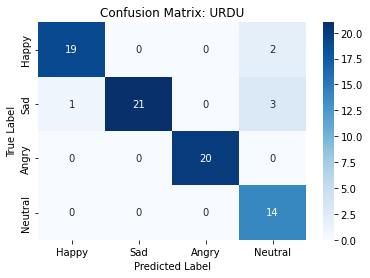

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# make predictions on the test set
y_pred = model.predict(x_test)

# define y_true as the one-hot encoded version of the test labels
y_true = np.zeros((len(y_test), 4)) # 4 is the number of emotions being classified
y_true[np.arange(len(y_test)), y_test] = 1

# convert y_pred from probabilities to class labels
predicted_labels = np.argmax(y_pred, axis=1)

# define y_pred as the one-hot encoded version of the predicted labels
y_pred = np.zeros((len(predicted_labels), 4)) # 4 is the number of emotions being classified
y_pred[np.arange(len(predicted_labels)), predicted_labels] = 1


cm = confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))
labels = ['Happy', 'Sad', 'Angry', 'Neutral'] # replace with your own emotion labels

# plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)

# add axis labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix: URDU')

# show the plot
plt.show()
